# Deep Learning

In a feed-forward architecture the term deep learning is commonly used when more 
than two layers of weights are involved. 

The relationship of recurrent architectures
and deep learning is less clear; however, due to their complex design and high
demands on computing power the more sophisticated recurrent networks such as LSTMs 
are also often classified as deep learning.

Deep learning as a commonly understood concept started in the late 2000s and
revived the field of connectionist machine
learning that had lost some of its momentum in the late 1980s due to

-    the limited computing power at the time
-    the lack of large scale datasets for training

Both are now abundant, at least compared to the situation 30 years ago. 
The advent of powerful and affordable graphics cards that can act as general-purpose GPUs 
further increased the available computing resources.
In addition, there have also been advances in connectionist machine learning, among them

-    new training and optimization methods, such as stochastic gradient descent
-    new network layers and concepts, such as dropout

**SGD**: It was found that in order to train a neural net it is not necessary to go through all observations before another weight update; even a small random sample tends to provide enough data for another gradient step. This stochastic gradient descent in minibatches
tends to result in improved learning speed on large datasets.

**Dropout**: 
The problem of generalization of learned weights to unseen data has been tackled,
among other things, with the idea of dropout i.e. setting a certain fraction of the neuron activation to zero, thereby forcing the net to rely less on particular feature detectors implemented by specific neuronal units and 
encode information in a more distributed fashion that tends to apply better to unseen 
data, again resulting in learning improvements.

#### Symbolic vs Connectionist AI 

In the early days of computing even in the 1950s it was envisioned that by 
relying on a suitable collection of explicit knowledge statements, and rules of logic for 
processing, an artificial intelligence could soon be constructed. Those hopes 
turned out to be premature. The symbolic approach has shown moderately promising and 
slowly improving results ever since; however, symbolic systems have always been plagued by 
'brittleness'  i.e. failing to be able to perform adequately outside of the narrow
domain for which they were developed.

In the late 2010s symbolic AI was increasingly overshadowed
by the often spectacular results of the connectionist approach, first in image processing,
and more recently in natural language processing; large language models in particular
have pushed the boundaries of what was thought possible, and current implementations rival
human performance in an ever increasing number of areas. However, this approach is also
not without problems, prominently among them the gigantic amount of computing power
needed to achieve the spectacular results of chatGPT and similar models, which is
only available to a very small number of organizations in the world -- mainly the Big Tech
companies who already dominate the information business. So much power in the hands of so very few has serious implications for
society.

Hybrid symbolic/connectionist models have been a hopeful area of research for several
decades. Recent developments have fuelled interest in these approaches; see e.g.
https://ceur-ws.org/Vol-3432/paper17.pdf.

## Embeddings

In natural language processing there are various methods of input encoding; however,
one approach continues to dominate applications, especially in deep learning
models: word embeddings.

Words carry meaning depending on their context; with proper learning procedures this meaning in context can be used to encode each word in a numeric vector that has some useful properties, such as

-    words with similar meanings map to similar numeric vectors
-    an encoding of a sentence can be derived by simply adding the word encodings
-    some relationships are also encoded up to a certain degree, such as capital-of:
     -   embedding['France'] - embedding['Paris'] is similar to
     -   embedding['Italy'] - embedding['Rome']

#### Glove

Word embeddings need to be trained on a _very_ large text corpus in order for these properties to materialize: the smallest GloVe version was trained on 6B tokens and contains a 400K vocabulary.
Fortunately, a number of trained embeddings are available for download:

-    Stanford GloVe embeddings https://nlp.stanford.edu/projects/glove/

Since the downloads at Stanford are huge there is a much smaller subset available here as

- <a href=glove.40k.6B.50d.txt.gz>glove.40k.6B.50d.txt.gz</a> 

for small-scale experiments. It only contains the most frequent 40k words
from the Wikipedia and Gigaword corpus.
Just like the full GloVe data above this data is made available under the 
<a href=http://opendatacommons.org/licenses/pddl/>Public Domain Dedication and License v1.0</a>
whose full text can be found at http://www.opendatacommons.org/licenses/pddl/1.0/. 


In [1]:
%%javascript
IPython.OutputArea.prototype._should_scroll = function(lines) { return false; }

<IPython.core.display.Javascript object>

In [2]:
import gzip
import numpy as np 
np.set_printoptions(suppress=True, threshold=20, precision=3) 

glove = {}
fn = 'glove.40k.6B.50d.txt.gz'
for line in gzip.open(fn):
    lst = line.decode('utf8').split()
    glove[lst[0]] = np.asarray(lst[1:], dtype='float32')
print(len(glove))
print(list(glove.keys())[:100])
print(glove['italy'])
print(glove['rome'])

40000
['the', ',', '.', 'of', 'to', 'and', 'in', 'a', '"', "'s", 'for', '-', 'that', 'on', 'is', 'was', 'said', 'with', 'he', 'as', 'it', 'by', 'at', '(', ')', 'from', 'his', "''", '``', 'an', 'be', 'has', 'are', 'have', 'but', 'were', 'not', 'this', 'who', 'they', 'had', 'i', 'which', 'will', 'their', ':', 'or', 'its', 'one', 'after', 'new', 'been', 'also', 'we', 'would', 'two', 'more', "'", 'first', 'about', 'up', 'when', 'year', 'there', 'all', '--', 'out', 'she', 'other', 'people', "n't", 'her', 'percent', 'than', 'over', 'into', 'last', 'some', 'government', 'time', '$', 'you', 'years', 'if', 'no', 'world', 'can', 'three', 'do', ';', 'president', 'only', 'state', 'million', 'could', 'us', 'most', '_', 'against', 'u.s.']
[ 1.77  -0.778 -0.953 ... -0.353  0.445 -0.837]
[ 1.733  0.745 -0.909 ... -0.585 -0.114 -0.829]


To explore the concepts represented in the embeddings we plot a few countries
and their capitals. Obviously the concept 'capital' is only present in a fuzzy fashion.

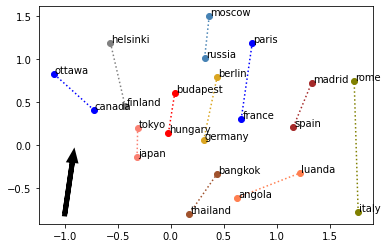

In [3]:
import matplotlib.pyplot as plt

def plte(a, b, c='blue', d=glove):
    i, j = 0, 1
    for x in (a,b):
        plt.scatter(d[x][i], d[x][j], c=c)
        plt.text(d[x][i]+0.01, d[x][j]+0.01, x)
    plt.plot([d[a][i], d[b][i]], 
             [d[a][j], d[b][j]], c=c, linestyle='dotted')
    dx.append([ d[b][i] - d[a][i] ])
    dy.append([ d[b][j] - d[a][j] ])

lst = (
    ('italy', 'rome', 'olive'),
    ('france', 'paris', 'blue'),
    ('spain', 'madrid', 'brown'),
    ('germany', 'berlin', 'goldenrod'),
    ('russia', 'moscow', 'steelblue'),
    ('japan', 'tokyo', 'salmon'),
    ('thailand', 'bangkok', 'sienna'),
    ('hungary', 'budapest', 'red'),
    ('angola', 'luanda', 'coral'),
    ('canada', 'ottawa', 'blue'),
    ('finland', 'helsinki', 'grey')
)  

dx, dy = [], []
for x in lst: plte(x[0], x[1], c=x[2])
plt.arrow(-1, -0.8, np.mean(dx), np.mean(dy), linewidth=5, head_width=0.05)
plt.show()

We are simply plotting the first two columns of the embeddings. Maybe
the result looks better if we transform to principal components?

italy [ 1.77  -0.778]
..pca [-0.547  1.114]


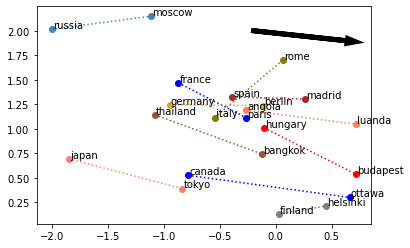

In [4]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)

keys = list(glove.keys())
vals = pca.fit_transform(np.asarray(list(glove.values())))
glove2 = {}
for i in range(len(keys)):
    glove2[keys[i]] = vals[i]

print('italy', glove['italy'][:2])
print('..pca', glove2['italy'])

dx, dy = [], []
for x in lst: plte(x[0], x[1], c=x[2], d=glove2)
plt.arrow(-0.2, 2, np.mean(dx), np.mean(dy), linewidth=5, head_width=0.05)
plt.show()

It looks like the concept of capital is represented
in the embeddings, just not very precisely.

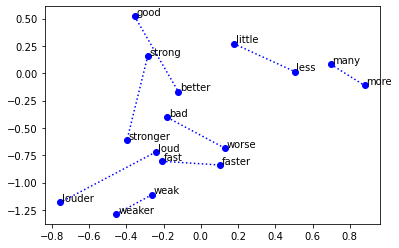

In [5]:
plte('strong', 'stronger')
plte('weak', 'weaker')
plte('loud', 'louder')
plte('fast', 'faster')
plte('good', 'better')
plte('bad', 'worse')
plte('little', 'less')
plte('many', 'more')
plt.show()

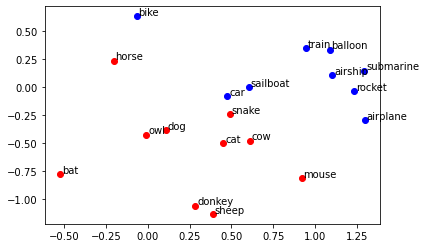

In [6]:
def pltw(w, col='blue'):
    i, j = 0, 1
    plt.scatter(glove[w][i], glove[w][j], c=col)
    plt.text(glove[w][i]+0.01, glove[w][j]+0.01, w)

for w in 'cat,dog,cow,horse,mouse,donkey,snake,owl,sheep,bat'.split(','): 
    pltw(w, col='red')    
for w in 'car,train,sailboat,bike,airplane,submarine,rocket,airship,balloon'.split(','): 
    pltw(w, col='blue')

plt.show()

# Basic RNN

Recurrent artificial neural networks have been developed to deal with input sequences
of varying length, e.g. words in sentences. Typical applications are machine translation, 
tagging, text classification, and sentiment detection.  

The basic recurrent net uses a single hidden state h
as a sort of memory for what it has already seen in the previous inputs; this hidden state together with the current input $x_t$ determine the next hidden state and the current output $y_t$

\begin{align}
h_t & = f(U h_{t-1} + V x_t + b_h)  \\
y_t & = g(W h_t + b_y)
\end{align}

Activation functions $f$ and $g$ can be e.g. sigmoid, tanh, ReLU; g may also be ommited. 
Weight matrices $U,V,W$ and bias $b_h,b_y$
are the parameters to be trained e.g. with gradient descent.

Note that just as in feed-forward networks the bias values can be substituted by
supplying an additional input value of one: the weight of this value serves the
same function as an explicit bias. However, in large networks the lack of a bias
typically has no noticeable effect on the results.

#### Unrolling

This architecture begs the question of how we can find derivatives and train weights 
when $y_t$ depends not only on the current $x_t$ but via the hidden state also on previous 
inputs $x_{t−1}, x_{t−2}, ...$

The concept of unrolling provides the answer: we start with some hidden state $h_0$
(e.g. random, or all zero) and use weights U,V,W to derive the next hidden state;
we repeat until arrive at the last input element. Note that depending on the
desired application the output values $y_1,...y_{t-1}$ may be ignored, such as in 
classification and sentiment detection.

\begin{align}
x_1, h_0 & \rightarrow U,V,W \rightarrow h_1, y_1 \\
x_2, h_1 & \rightarrow U,V,W \rightarrow h_2, y_2 \\
x_3, h_2 & \rightarrow U,V,W \rightarrow h_3, y_3 \\
... &  \\
%x_t, h_ {t-1} & \rightarrow U,V,W \rightarrow h_t, y_{t} \\
%x_{t-3}, h_{t-4} & \rightarrow U,V,W \rightarrow h_{t-3}, y_{t-3} \\
%x_{t-2}, h_{t-3} & \rightarrow U,V, W \rightarrow h_{t-2}, y_{t-2} \\
%x_{t-1}, h_{t-2} & \rightarrow U,V,W \rightarrow h_{t-1}, y_{t-1} \\
x_{t}, h_{t-1} & \rightarrow U,V,W \rightarrow h_{t}, y_{t} \\
\end{align}
    
Since all input values and the desired output(s) are known we can now train the
weights to minimize the error, using our favorite optimizer in a similar fashion
to feed-forward networks.

Training recurrent architectures used to be extremely costly in terms of computing power, and the basic recurrent neural net suffers from major drawbacks, most of all 
'forgetting' items early in the sequence. 

Newer architectures such as the LSTM improve on the basic model and result in much better performance even on long input sequences as they 'learn to forget' the unimportant input tokens.

The basic recurrent neural net serves to illustrate the concept but
tends to perform poorly compared to more advanced architectures, so we will not
bother with an implementation of the basic RNN.

## LSTM

The long-short term memory architecture has brought some impressive successes to the deep learning approach. Built on the basic RNN this version of a recurrent network adds some more hidden states:

-    a forget gate decides on what to throw away,
-    an input gate decides on what to update, and
-    an output gate decides on what to output

From the current input and the previous hidden state the values for the gates and the new candidate values for the cell state C
are computed:

\begin{align}
F_t & = \sigma ~ (W_F \cdot [h_{t-1}, x_t]) \\
I_t & = \sigma ~ (W_I \cdot [h_{t-1}, x_t]) \\
y_t & = \sigma ~ (W_y \cdot [ h_{t-1}, x_t]) \\
\tilde{C} & = \tanh (W_C \cdot [h_{t-1}, x_t])
\end{align}

The new cell state $C_t$ is computed by 'forgetting' part of the previous state $C_{t−1}$ and (based on the current input) adding part of the candidate values $\tilde{C}_t$:

$$C_t = F_t * C_{t-1} + I_t * \tilde{C}_t$$

The new hidden state is based on the cell state and the current output:

$$h_t = y_t * \tanh (C_t)$$


With more complex network architectures the derivatives and the implementation become too
involved for us to code in pure Python. Here we will be satisfied to use a package that does 
all the footwork for us: in this case, Torch.



In [7]:
import torch as t

inp_dim = 5
outp_dim = 4 # same as hid_dim
seq_len = 3
num_seq = 2

lstm = t.nn.LSTM(inp_dim, outp_dim)  
inputs = [ [t.randn(1, inp_dim) for _ in range(seq_len)] for _ in range(num_seq) ]

for x in inputs:
    x = t.cat(x).view(len(x), 1, -1)
    h = (t.randn(1, 1, outp_dim), t.randn(1, 1, outp_dim))  
    y, h = lstm(x, h) # result h: continue with this hidden state
    print('input x:\n', x)
    print('output y:\n', y)


input x:
 tensor([[[ 1.3642, -0.0552,  0.1842,  1.6008,  0.5855]],

        [[ 0.6838, -0.0614, -0.7697, -1.9358,  1.8463]],

        [[-0.1662,  0.6860,  0.6045,  0.6122, -1.5297]]])
output y:
 tensor([[[-0.4593,  0.3133, -0.0339, -0.0628]],

        [[-0.4378,  0.1973, -0.2831, -0.0136]],

        [[-0.2765,  0.0468, -0.1111,  0.0668]]],
       grad_fn=<MkldnnRnnLayerBackward0>)
input x:
 tensor([[[-1.6985, -2.0143,  0.4661,  1.3940, -0.8260]],

        [[ 1.3738, -1.6897, -0.4179, -0.0487, -0.7622]],

        [[-2.5399,  2.3927,  0.1136, -0.3747,  0.2950]]])
output y:
 tensor([[[ 0.1838,  0.4865,  0.0568, -0.0263]],

        [[ 0.1809, -0.0369, -0.0408, -0.0485]],

        [[ 0.0826, -0.0395, -0.1100,  0.4770]]],
       grad_fn=<MkldnnRnnLayerBackward0>)


## Sentiment Detection

A common task in machine learning is the automatic detection of sentiment in reasonably short texts, such as product reviews or social media postings. This task lends itself well to recurrent nets since the number of input words is variable; the net has to 
go through the sequence and learn which words are relevant for the desired result. 

Our dataset can be found on the UCI Machine Learning repository:

https://archive.ics.uci.edu/ml/datasets/Sentiment+Labelled+Sentences

Download the ZIP file, extract the file imdb_labelled.txt, and upload it to the notebook server, or put it into your current directory.

Now we are ready to import our data:


In [8]:
import numpy as np
import random

data = [ line.split() for line in open('imdb_labelled.txt').readlines() ]
random.seed(13)
random.shuffle(data)
rev = [ [ w.strip('.,').lower() for w in line[:-1] ] for line in data ]
sen = np.asarray([ int(line[-1]) for line in data ])

print(rev[:5], sen[:5])
print('mean length:', np.mean([len(s) for s in rev]))
print('reviews:', len(sen), 'positive:', sum(sen))

[['all', 'the', 'actors', 'give', 'a', 'wonderful', 'performance', 'especially', 'jennifer', 'rubin', 'as', 'jamie', 'harris', 'who', 'changes', 'from', 'the', 'nervous', 'starlet', 'in', 'the', 'beginning', 'through', 'the', 'strange', 'events', 'she', 'is', 'part', 'of', 'to', 'the', 'cool', 'star'], ['babie', 'bop', 'is', 'very', 'cute'], ['hackneyed', 'writing', 'certainly', 'but', 'made', 'even', 'worse', 'by', 'the', 'bad', 'directing'], ['it', 'is', 'indescribably', 'the', 'most', 'annoying', 'and', 'idiotic', 'show', 'i', 'have', 'ever', 'seen'], ['it', 'is', 'zillion', 'times', 'away', 'from', 'reality']] [1 1 0 0 0]
mean length: 14.355
reviews: 1000 positive: 500


We can see that

- the dataset is balanced: 1000 observations, half of them positive
- the sequences are conveniently short



Prepare embeddings for the words in our sentences:
- contruct embedding matrix by selecting only the glove entries we need
- replace words by their index into the embedding matrix

In [9]:
import torch as t

word_ix = {}
ix_word = {}
for s in rev:
    for w in s:
        if (w not in word_ix) and (w in glove):
            word_ix[w] = len(word_ix)
            ix_word[len(word_ix)-1] = w
        
embeddings = t.tensor(np.array([ glove[w] for w in word_ix ]))

X, Y = [], []
for i in range(len(rev)):
    ix = [ word_ix[w] for w in rev[i] if w in word_ix ]
    if len(ix) > 0:
        X.append(t.tensor(ix, dtype=t.long))
        Y.append(sen[i])
Y = t.tensor(Y)

print(rev[0])
print(X[0])
print([ix_word[int(i)] for i in X[0]])
print(sen[0])
print(len(X), len(Y))

['all', 'the', 'actors', 'give', 'a', 'wonderful', 'performance', 'especially', 'jennifer', 'rubin', 'as', 'jamie', 'harris', 'who', 'changes', 'from', 'the', 'nervous', 'starlet', 'in', 'the', 'beginning', 'through', 'the', 'strange', 'events', 'she', 'is', 'part', 'of', 'to', 'the', 'cool', 'star']
tensor([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15,  1, 16,
        17,  1, 18, 19,  1, 20, 21, 22, 23, 24, 25, 26,  1, 27, 28])
['all', 'the', 'actors', 'give', 'a', 'wonderful', 'performance', 'especially', 'jennifer', 'rubin', 'as', 'jamie', 'harris', 'who', 'changes', 'from', 'the', 'nervous', 'in', 'the', 'beginning', 'through', 'the', 'strange', 'events', 'she', 'is', 'part', 'of', 'to', 'the', 'cool', 'star']
1
996 996


We are now ready to run an LSTM tagger on the dataset.

We use the Embedding module which allows for training the embeddings further 
in an applications-specific manner. This adds a massive amount of trainable
parameters, yet the gains in this example are minimal.

The LSTM implementation in Torch returns all outputs computed in each step
in the sequence. When we define the loss as a function of the last output element 
(e.g. for classification of a sequence) then the gradients can be computed automatically.

In [10]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

emb_dim = embeddings.shape[1]
hid_dim = emb_dim

class LSTMTagger(nn.Module):

    def __init__(self, embeddings, hid_dim, vocab_size, tagset_size):
        super(LSTMTagger, self).__init__()
        emb_dim = embeddings.shape[1] 
        # add the layers
        self.embeds = nn.Embedding.from_pretrained(embeddings, freeze=False)
        self.lstm = nn.LSTM(emb_dim, hid_dim)
        self.hidden2tag = nn.Linear(hid_dim, 1)

    def forward(self, lst):
        # pass data through layers
        emb = self.embeds(lst)
        lstm_out, _ = self.lstm(emb.view(len(emb), 1, -1))
        tag = self.hidden2tag(lstm_out.view(len(emb), -1))
        outp = t.sigmoid(tag)
        return outp
    
model = LSTMTagger(embeddings, hid_dim, len(word_ix), 1)
print('model:\n', model)
for x in model.parameters():
    if x.requires_grad: print(list(x.shape))
print('trainable parameters:', sum([ x.numel() for x in model.parameters() ]))
loss_function = nn.MSELoss()
optimizer = optim.SGD(model.parameters(), lr=0.1)

def accu(o, y):
    return int(round(o.item()) == y.item())

for ep in range(21):  
    sse, acctr = 0, 0
    # the first ntrain rows are the training data
    ntrain = int(len(X)*0.8)
    for i in range(ntrain):
        model.zero_grad()
        outp = model(X[i])
        loss = t.square(outp[-1] - Y[i])
        sse += loss.item()
        acctr += accu(outp[-1], Y[i])
        loss.backward()
        optimizer.step()
    # go through test data without gradient update
    with torch.no_grad():
        accte = 0
        for i in range(ntrain, len(X)):
            outp = model(X[i])
            accte += accu(outp[-1], Y[i])
    if (ep%2)==0:
        print('epoch: %2d  sse: %5.1f  acc_train: %.2f  acc_test: %.2f' % 
          (ep, sse, acctr/ntrain, accte/(len(X)-ntrain)))
        
# epoch: 20  sse:  35.6  acc_train: 0.95  acc_test: 0.73

model:
 LSTMTagger(
  (embeds): Embedding(2568, 50)
  (lstm): LSTM(50, 50)
  (hidden2tag): Linear(in_features=50, out_features=1, bias=True)
)
[2568, 50]
[200, 50]
[200, 50]
[200]
[200]
[1, 50]
[1]
trainable parameters: 148851
epoch:  0  sse: 190.8  acc_train: 0.59  acc_test: 0.67
epoch:  2  sse: 151.5  acc_train: 0.70  acc_test: 0.69
epoch:  4  sse: 112.4  acc_train: 0.81  acc_test: 0.76
epoch:  6  sse:  83.7  acc_train: 0.85  acc_test: 0.79
epoch:  8  sse:  56.4  acc_train: 0.92  acc_test: 0.79
epoch: 10  sse:  39.2  acc_train: 0.95  acc_test: 0.78
epoch: 12  sse:  33.7  acc_train: 0.95  acc_test: 0.74
epoch: 14  sse:  25.5  acc_train: 0.97  acc_test: 0.75
epoch: 16  sse:  20.4  acc_train: 0.97  acc_test: 0.73
epoch: 18  sse:  15.6  acc_train: 0.98  acc_test: 0.73
epoch: 20  sse:  14.4  acc_train: 0.98  acc_test: 0.75


Note how the accuracy on the training set keeps improving, while on the test set
it reaches a peak and then drops -- the weights learned on the
training set do not generalize to the test set: overfitting.

## EXERCISES

-    Find more datasets for sentiment detection, or any other classification problem
-    Apply the code to the new dataset
-    Modify the code a little (or a lot!), change the parameters
-    Observe and document the results



## Other Notes

Here are some sources to further explore the topic:
    
- https://josehoras.github.io/lstm-pure-python/